# Math 407 Project

1. Find a procedure for sampling uniformly on the surface of the sphere. 

**Part (a):** Use computer to generate a thousand points that are random, independent, and uniform on the unit sphere, and print the resulting picture.

**Algorithm**:

- Use random.randn in numpy library to generate (3,1000) arrays
- Use linalg.norm in numpy library to generate normalize the values 
- plot the figure in the following

In [1]:
%matplotlib inline
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.mplot3d import axes3d

In [2]:
my_data = genfromtxt('/Users/apple/Downloads/correct.csv', delimiter=',')

In [3]:
my_data = my_data[1:]
xi = my_data[:,2]
yi = my_data[:,3]
zi = my_data[:,4]

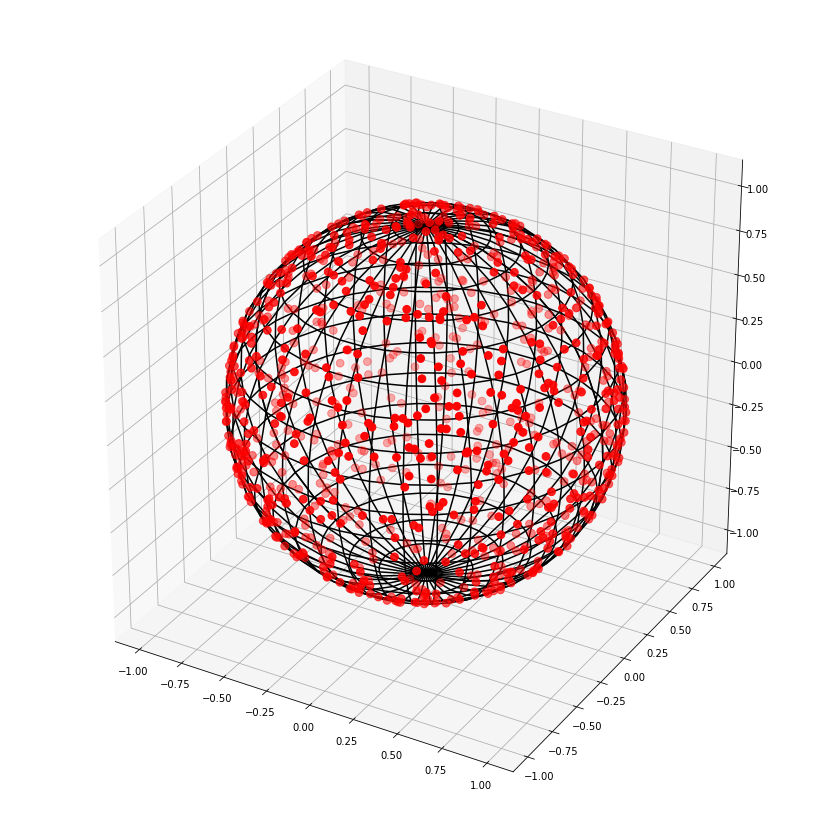

In [4]:
phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))

fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d', 'aspect':'equal'})
ax.plot_wireframe(x, y, z, color='k', rstride=1, cstride=1)
ax.scatter(xi, yi, zi, s=60, c='r', zorder=10)
fig.set_figheight(15)
fig.set_figwidth(15)

**Part (b):** By putting sufficiently many independent uniform points on the surface of the Earth (not literally but using a computer model, of course), estimate the areas of Antarctica and Africa, compare your results with the actual values, and make a few comments (e.g. are the relative errors similar? would you expect them to be similar? if not, which one should be bigger? etc.)

In [1]:
import geopandas
df = geopandas.read_file('/Users/apple/Downloads/gadm36_ATA_gpkg/gadm36_ATA.gpkg', driver="GPKG")

In [2]:
df.plot(cmap='Set2', figsize=(50, 10))

In [3]:
print(type(df['geometry'][0]))

<class 'shapely.geometry.multipolygon.MultiPolygon'>


In [4]:
from shapely.geometry import Point
from shapely.ops import unary_union
unary_union(df['geometry'][0]).wkt

KeyboardInterrupt: 

In [ ]:
for index, row in df.iterrows():
    for pt in list(row['geometry'].exterior.coords):
        print (Point(pt))

In [15]:
import pandas as pd
import shapely.geometry as Polygon

In [19]:
def transformation(theta, phi):
    longitude = np.zeros((1000, ))
    latitude = np.zeros((1000, ))
    # initialize values for longitude and latitude 

    phi = my_data[:,1]
    theta = my_data[:,0]
    for i in range(1000):
        if theta[i] < np.pi:
            longitude[i] = - (180 - theta[i] / np.pi * 180)
        else:
            longitude[i] = (theta[i] - np.pi) / np.pi * 180

        if phi[i] < 0.5 * np.pi:
            latitude[i] = (90 - phi[i] / np.pi * 180)
        else:
            latitude[i] = - (phi[i] - 0.5 * np.pi) / np.pi * 180
    return longitude, latitude

In [26]:
longitude, latitude = transformation(my_data[:,0], my_data[:,1])
from geopandas import GeoSeries
import shapely.geometry as Point
s = GeoSeries(map(list(zip(longitude, latitude))).map(Polygon))

TypeError: map() must have at least two arguments.

In [27]:
longitude, latitude = transformation(my_data[:,0], my_data[:,1])

In [45]:
df = pd.DataFrame({'Latitude': latitude,
                   'Longitude': longitude})